# Lesson 3: Demos


## Normality Demo
http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-21.html

In [2]:
#General imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Although the mean and median both give us some sense of the center of a distribution, they aren't always the same. The *median* gives us a value that **splits the data into two halves** while the *mean* is a **numeric average,** so extreme values can have a significant impact on the mean. 

In a symmetric distribution, the mean and median will be the same. Let's investigate with a density plot:

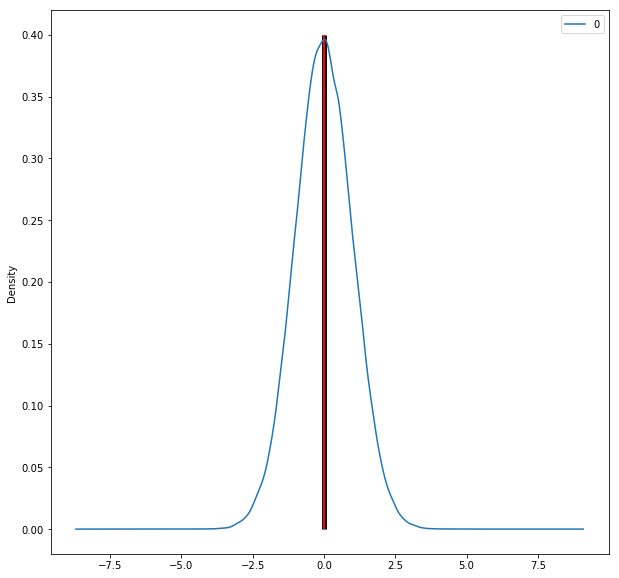

In [4]:
norm_data = pd.DataFrame(np.random.normal(size=100000))

norm_data.plot(kind="density",
              figsize=(10,10))


plt.vlines(norm_data.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.4,
           linewidth=5.0)

plt.vlines(norm_data.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.4, 
           linewidth=2.0,
           color="red")

In the plot above, the mean and median are both so close to zero that the red median line lies on top of the thicker black line drawn at the mean. 

In skewed distributions, the mean tends to get pulled in the direction of the skew, while the median tends to resist the effects of skew:
 

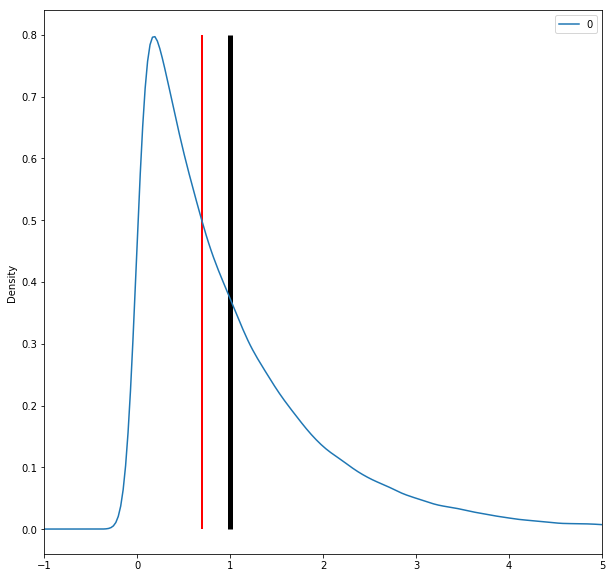

In [5]:
skewed_data = pd.DataFrame(np.random.exponential(size=100000))

skewed_data.plot(kind="density",
              figsize=(10,10),
              xlim=(-1,5))


plt.vlines(skewed_data.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.8,
           linewidth=5.0)

plt.vlines(skewed_data.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.8, 
           linewidth=2.0,
           color="red")

Notice that the mean is also influenced heavily by outliers, while the median resists the influence of outliers:


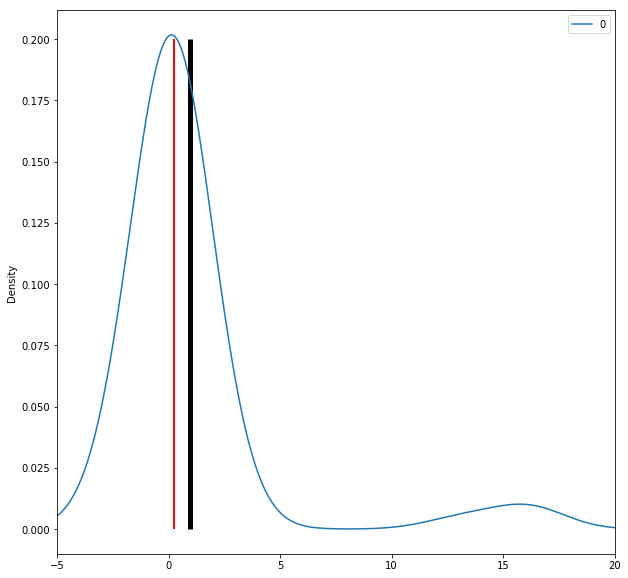

In [6]:
norm_data = np.random.normal(size=50)
outliers = np.random.normal(15, size=3)
combined_data = pd.DataFrame(np.concatenate((norm_data, outliers), axis=0))

combined_data.plot(kind="density",
              figsize=(10,10),
              xlim=(-5,20))


plt.vlines(combined_data.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=5.0)

plt.vlines(combined_data.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2, 
           linewidth=2.0,
           color="red")

Since the median tends to resist the effects of skewness and outliers, it is known a "robust" statistic. 

The median generally gives a better sense of the typical value in a distribution with significant skew or outliers.

In [8]:
comp1 = np.random.normal(0, 1, size=200) # N(0, 1)
comp2 = np.random.normal(10, 2, size=200) # N(10, 4)

df1 = pd.Series(comp1)
df2 = pd.Series(comp2)

df1

0     -0.009384
1     -1.258289
2     -1.695340
3     -0.056857
4      0.548970
5      1.043668
6      0.748101
7      0.715529
8      0.907210
9     -0.229087
10    -0.395265
11    -0.205127
12    -0.219627
13     1.182799
14    -1.028864
15     0.273003
16    -0.172836
17    -0.629983
18    -0.352321
19     2.146243
20    -0.406958
21    -0.561244
22     0.707267
23     0.240683
24     2.215221
25    -0.085378
26    -1.318004
27     0.248564
28    -0.215815
29    -0.649413
         ...   
170    0.124686
171    0.936831
172    0.070723
173    0.667913
174   -0.776202
175    0.812147
176   -0.431293
177   -1.072433
178   -1.116820
179   -1.023112
180   -1.257624
181   -1.139625
182    0.354987
183    0.227200
184    1.411477
185   -0.480809
186   -0.644575
187    0.528319
188    0.176029
189    0.432473
190    1.072843
191   -0.406755
192    1.130790
193    1.397963
194    0.108293
195    0.484357
196    0.241151
197    0.253203
198    0.021342
199   -1.314071
Length: 200, dtype: floa

### Skewness and Kurtosis
*Skewness* measures the **skew or asymmetry of a distribution** while *Kurtosis* measures the **"peakedness" of a distribution**. 

We won't go into the exact calculations behind these, but they are essentially just statistics that take the idea of variance a step further: while variance involves squaring deviations from the mean, skewness involves cubing deviations from the mean, and kurtosis involves raising deviations from the mean to the 4th power.

Pandas has built in functions for checking skewness and kurtosis, df.skew() and df.kurt() respectively:

In [9]:
url = "https://github.com/JamesByers/GA-SEA-DAT2/raw/master/data/mtcars.csv"
mtcars = pd.read_csv(url)
mtcars

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


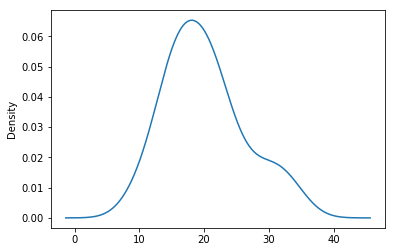

In [10]:
mtcars["mpg"].plot(kind="density")

In [11]:
mtcars["mpg"].skew()  # Check skewness

0.67237713762908047

In [12]:
mtcars["mpg"].kurt()  # Check kurtosis 

-0.0220062914240855

To explore these two measures further, let's create some dummy data and inspect it:

In [13]:
norm_data = np.random.normal(size=100000)
skewed_data = np.concatenate((np.random.normal(size=35000)+2, 
                             np.random.exponential(size=65000)), 
                             axis=0)
uniform_data = np.random.uniform(0,2, size=100000)
peaked_data = np.concatenate((np.random.exponential(size=50000),
                             np.random.exponential(size=50000)*(-1)),
                             axis=0)

data_df = pd.DataFrame({"norm":norm_data,
                       "skewed":skewed_data,
                       "uniform":uniform_data,
                       "peaked":peaked_data})

In [22]:
data_df

,norm,peaked,skewed,uniform
0,-0.720228,2.978789,2.739450,0.214015
1,-0.957977,1.174181,1.400689,0.415994
2,1.742699,0.149354,1.885784,0.524665
3,-0.289188,0.167478,2.421229,0.589210
4,-0.177189,1.177675,0.614630,1.431957
5,0.107047,0.098596,3.128647,0.258247
6,0.874655,3.606570,1.649477,0.845805
7,-0.566468,2.009273,2.551419,1.039012
8,0.264970,3.558651,1.636420,0.873914
9,-1.193286,0.446998,2.302004,0.871894


## Types of distributions

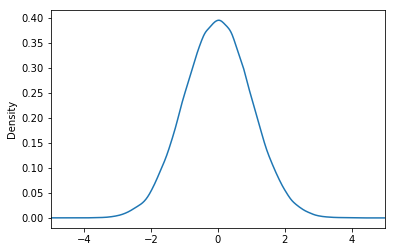

In [14]:
data_df["norm"].plot(kind="density", xlim=(-5,5))

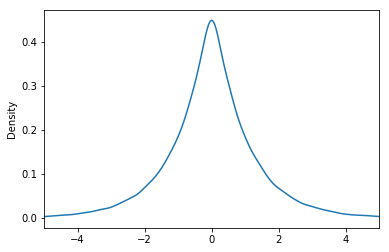

In [15]:
data_df["peaked"].plot(kind="density", xlim=(-5,5))

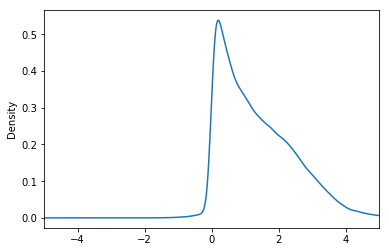

In [16]:
data_df["skewed"].plot(kind="density", xlim=(-5,5))

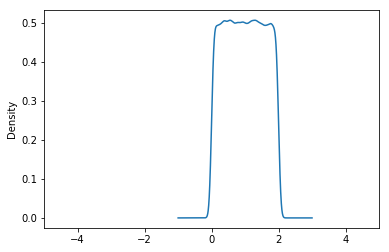

In [17]:
data_df["uniform"].plot(kind="density", xlim=(-5,5))

### All together

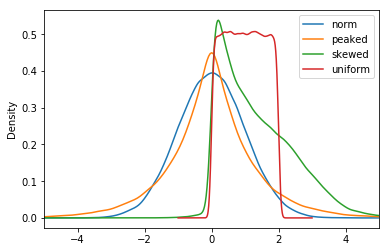

In [23]:
data_df.plot(kind="density",
            xlim=(-5,5))

### Skewness

Now let's check the skewness of each of these distributions. 

Since skewness measures asymmetry, we'd expect to see low skewness for all of the distributions except the skewed one, because all the others are roughly symmetric:

In [24]:
data_df.skew()

norm       0.008615
peaked    -0.019640
skewed     0.980955
uniform    0.004162
dtype: float64

### Kurtosis

Now let's check kurtosis. Since kurtosis measures peakedness, we'd expect the flat (uniform) distribution to have low kurtosis while the distributions with sharper peaks should have higher kurtosis.

In [25]:
data_df.kurt()

norm      -0.011752
peaked     3.000835
skewed     1.116151
uniform   -1.194504
dtype: float64

As we can see from the output, the normally distributed data has a kurtosis near zero, the flat distribution has negative kurtosis, and the two pointier distributions have positive kurtosis.


---


## Class (Category) Variable Demo (Bonus content)
We will be learning more about dummy variables when we create some of our models in later lessons.  So the bonus  content here is for those who want to get an early exposure.

### Class/Dummy Variables
We want to represent categorical variables numerically, but we can't simply code them as 0=rural, 1=suburban, 2=urban because that would imply an **ordered relationship** between suburban and urban (suggesting that urban is somehow "twice" the suburban category, which doesn't make sense).

Why do we only need **two dummy variables, not three?** Because two dummies capture all of the information about the Area feature, and implicitly defines rural as the reference level.

In general, if you have a categorical feature with k levels, you create k-1 dummy variables.


#### Create three dummy variables using get_dummies, then exclude the first dummy column
my_categorical_var_dummies = pd.get_dummies(my_categorical_var, prefix='Area').iloc[:, 1:]

In [50]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Handling Categorical Predictors with Two Categories

Up to now, all of our predictors have been numeric. What if one of our predictors was categorical?

Let's create a new feature called "Size," and randomly assign observations to be small or large:

In [52]:
# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large'
data.head()

,TV,radio,newspaper,sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


For scikit-learn, we need to represent all data numerically. 

If the feature only has two categories, we can simply create a dummy variable that represents the categories as a binary value.

In [30]:
# create a new Series called IsLarge
data['IsLarge'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,radio,newspaper,sales,Size,IsLarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


### Handling Categorical Predictors with More than Two Categories

Let's create a new feature called Area, and randomly assign observations to be rural, suburban, or urban:

In [53]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
print(len(mask_suburban))
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

200


,TV,radio,newspaper,sales,Size,Area
1,230.1,37.8,69.2,22.1,large,rural
2,44.5,39.3,45.1,10.4,small,urban
3,17.2,45.9,69.3,9.3,small,rural
4,151.5,41.3,58.5,18.5,small,urban
5,180.8,10.8,58.4,12.9,large,suburban


In [54]:
len(data[data['Area'] =='rural'])

59

We have to represent Area numerically, but we can't simply code it as 0=rural, 1=suburban, 2=urban because that would imply an ordered relationship between suburban and urban (and thus urban is somehow "twice" the suburban category).

Instead, we create another dummy variable:

In [55]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,radio,newspaper,sales,Size,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,rural,0,0
2,44.5,39.3,45.1,10.4,small,urban,0,1
3,17.2,45.9,69.3,9.3,small,rural,0,0
4,151.5,41.3,58.5,18.5,small,urban,0,1
5,180.8,10.8,58.4,12.9,large,suburban,1,0
